In [1]:
import tensorflow as tf
model = tf.keras.models.load_model("clothmodel1")
model.summary()

2022-12-09 15:01:08.226752: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


2022-12-09 15:01:09.045669: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-12-09 15:01:09.076718: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:968] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-09 15:01:09.076758: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2022-12-09 15:01:09.076783: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-12-09 15:01:09.077851: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-12-09 15:01:09.079799: I tensorflow/str

In [2]:
import urllib.request
from PIL import Image
import numpy as np

In [3]:
urllib.request.urlretrieve("https://pixy.org/src/154/thumbs350/1547777.jpg", "jeans.jpg")

('jeans.jpg', <http.client.HTTPMessage at 0x7f9ce82b12b0>)

In [4]:
img = Image.open("jeans.jpg")

In [5]:
img_gray = img.convert("L")

In [6]:
img_gray_small = img_gray.resize((28,28))

In [7]:
img_gray_small.save("gray_small_jeans.jpg")

In [8]:
np_image = np.array(img_gray_small)

In [9]:
np_image.shape

(28, 28)

In [10]:
image_flat = np_image.ravel()

In [11]:
image_flat.shape

(784,)

In [12]:
prediction = model.predict(np_image)

ValueError: in user code:

    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:385 call
        return self._run_internal_graph(
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/ainoaho/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_14 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 28]


In [ ]:
prediction = model.predict(np.expand_dims(np_image, 0))

In [ ]:
np.expand_dims(np_image, 0).shape

In [ ]:
np.expand_dims(np_image, 1).shape

In [ ]:
prediction

In [ ]:
class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat",
               "Sandals", "Shirt", "Sneakers", "Bag", "Ankle boot"]

In [ ]:
prediction = model.predict(np.expand_dims(np_image/255, 0))

In [ ]:
prediction

In [17]:
model2 = tf.keras.models.load_model("clothmodel2")
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
np_image_normal = np_image/255

In [19]:
prediction2 = model2.predict(np.expand_dims(np_image_normal, 0))

In [20]:
prediction2

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

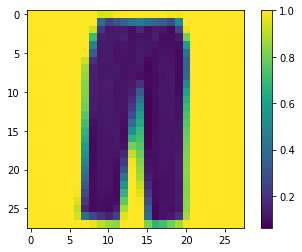

In [37]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(np_image_normal)
plt.colorbar()
plt.show()

In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [25]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [26]:
test_labels.shape

(10000,)

In [34]:
test_labels[34]

8

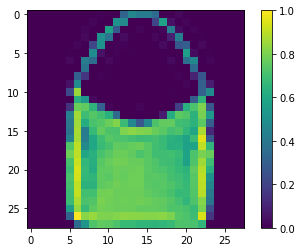

In [38]:
plt.figure()
plt.imshow(test_images[34]/255)
plt.colorbar()
plt.show()

In [39]:
test_bag = test_images[34]/255

In [40]:
np_image_normal[0][0]

1.0

In [41]:
test_bag[0][0]

0.0

In [45]:
np_image_normal_inverted = 1 - np_image_normal 

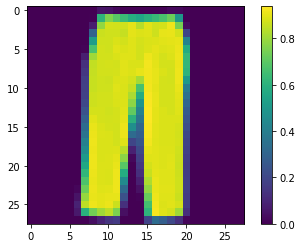

In [48]:
plt.figure()
plt.imshow(np_image_normal_inverted)
plt.colorbar()
plt.show()

In [53]:
prediction3 = model2.predict(np.expand_dims(np_image_normal_inverted, 0))

In [54]:
prediction3

array([[3.0022512e-13, 1.0000000e+00, 1.1982284e-21, 1.4308774e-15,
        4.6436436e-23, 1.6548661e-21, 3.4384812e-25, 1.3944350e-22,
        4.8739551e-27, 4.0248939e-29]], dtype=float32)

In [55]:
class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat",
               "Sandals", "Shirt", "Sneakers", "Bag", "Ankle boot"]

In [56]:
test_bag.mean()

0.279311724689876

In [57]:
np_image_normal.mean()

0.665421168467387

In [58]:
test_predictions = model2.predict(test_images/255)

In [59]:
test_predictions.shape

(10000, 10)

In [61]:
test_predictions[0]

array([7.2397019e-12, 8.0587663e-14, 3.9741992e-13, 1.1997284e-11,
       4.0343261e-14, 8.2395536e-06, 4.4225471e-15, 8.0530799e-07,
       4.1177804e-11, 9.9999094e-01], dtype=float32)

In [62]:
result_label = np.argmax(test_predictions, axis=1)

In [64]:
result_label.shape

(10000,)

In [69]:
result_label[0]

9

In [70]:
result_label[1001]

3

In [71]:
test_labels[0]

9

In [76]:
wrong_predictions = np.zeros([3,1])
for i, val in enumerate(result_label):
    if test_labels[i] != val:
        wrong_predictions = np.append(wrong_predictions, [[i], [test_labels[i]], [val]], axis=1)

In [77]:
np.array(np.unique(wrong_predictions[1], return_counts=True)).T

array([[   0.,  150.],
       [   1.,   48.],
       [   2.,   73.],
       [   3.,  101.],
       [   4., 1000.],
       [   5.,   58.],
       [   6.,  498.],
       [   7.,   71.],
       [   8.,   36.],
       [   9.,   42.]])

In [78]:
class_names

['T-shirt/top',
 'Trousers',
 'Pullover',
 'Dress',
 'Coat',
 'Sandals',
 'Shirt',
 'Sneakers',
 'Bag',
 'Ankle boot']